In [1]:
from libeq.data_structure import SolverData
from libeq import EqSolver
from libeq.utils import species_concentration
import numpy as np
import matplotlib.pyplot as plt

# Create SolverData object
solver_data = SolverData.load_from_pyes(
    "/Users/lorenzo/Coding/libeq/notebooks/cu_gly_solid.json"
)

In [2]:
solver_data.distribution_opts.initial_log = 2
solver_data.distribution_opts.final_log = 12
solver_data.ionic_strength_dependence = False

In [3]:
result, log_beta, log_ks, saturation_index, total_concentration = EqSolver(
    solver_data, mode="titration"
)

In [4]:
log_ks

array([[8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91],
       [8.91]])

In [5]:
solution = species_concentration(
    result, log_beta=log_beta, stoichiometry=solver_data.stoichiometry, full=True
)

In [6]:
charges = np.concatenate((solver_data.charges, solver_data.species_charges))
only_soluble = np.concatenate(
    (
        solution[:, :3],
        solution[:, -12:],
    ),
    axis=1,
)

ionic_strength = 0.5 * (only_soluble * (charges**2)).sum(axis=1, keepdims=True)

ionic_strength

array([[6.38332276e-04],
       [5.98286832e-04],
       [5.60202698e-04],
       [5.24039877e-04],
       [4.89718246e-04],
       [4.57127262e-04],
       [4.26136889e-04],
       [3.96607926e-04],
       [3.68400507e-04],
       [3.41380305e-04],
       [3.15422476e-04],
       [2.90413760e-04],
       [2.66253218e-04],
       [2.42852083e-04],
       [2.20133106e-04],
       [1.98029704e-04],
       [1.76485152e-04],
       [1.55452055e-04],
       [1.34892485e-04],
       [1.14779550e-04],
       [9.51025520e-05],
       [7.58825777e-05],
       [5.72259135e-05],
       [3.91139884e-05],
       [2.24566188e-05],
       [1.29858492e-05],
       [2.22574309e-05],
       [3.83210814e-05],
       [5.54479528e-05],
       [7.27991899e-05],
       [9.01714764e-05],
       [1.07493804e-04],
       [1.24735673e-04],
       [1.41882258e-04],
       [1.58925812e-04],
       [1.75862154e-04],
       [1.92689060e-04],
       [2.09405440e-04],
       [2.26010905e-04],
       [2.42505503e-04],


In [7]:
total_concentration

array([[ 1.00000000e-03,  2.00000000e-03,  1.00000000e-03],
       [ 9.96015936e-04,  1.99203187e-03,  9.56175299e-04],
       [ 9.92063492e-04,  1.98412698e-03,  9.12698413e-04],
       [ 9.88142292e-04,  1.97628458e-03,  8.69565217e-04],
       [ 9.84251969e-04,  1.96850394e-03,  8.26771654e-04],
       [ 9.80392157e-04,  1.96078431e-03,  7.84313725e-04],
       [ 9.76562500e-04,  1.95312500e-03,  7.42187500e-04],
       [ 9.72762646e-04,  1.94552529e-03,  7.00389105e-04],
       [ 9.68992248e-04,  1.93798450e-03,  6.58914729e-04],
       [ 9.65250965e-04,  1.93050193e-03,  6.17760618e-04],
       [ 9.61538462e-04,  1.92307692e-03,  5.76923077e-04],
       [ 9.57854406e-04,  1.91570881e-03,  5.36398467e-04],
       [ 9.54198473e-04,  1.90839695e-03,  4.96183206e-04],
       [ 9.50570342e-04,  1.90114068e-03,  4.56273764e-04],
       [ 9.46969697e-04,  1.89393939e-03,  4.16666667e-04],
       [ 9.43396226e-04,  1.88679245e-03,  3.77358491e-04],
       [ 9.39849624e-04,  1.87969925e-03

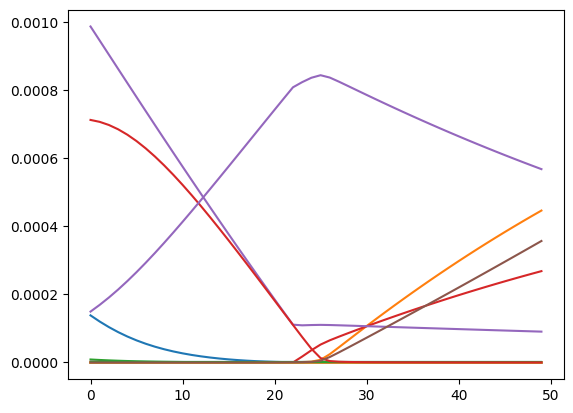

In [8]:
plt.plot(solution);